In [2]:

import os
import nibabel as nib
import nibabel.orientations as nio
from data_utilities_combined import *
import pickle
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import torch
import pickle
from copy import deepcopy
from tqdm import tqdm
import SimpleITK as sitk
from scipy import ndimage

# Raw image

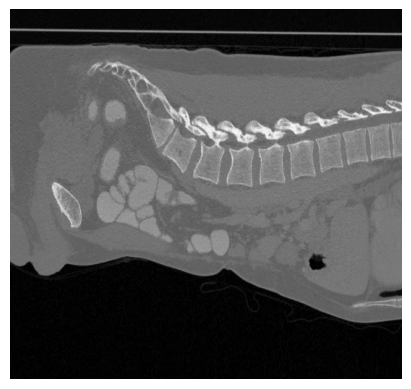

In [7]:
# load image
nii_file = nib.load(f'Data\\Verse20_training_unpacked_spinetools\\raw\\sub-verse500_dir-ax_img.nii.gz')
# Get the image data
img_data = nii_file.get_fdata()

# Display the image (slice-by-slice)
num_slices = img_data.shape[-1]

# Choose a slice to display (you can change the slice index as needed)
slice_index = num_slices // 2  # Displaying the middle slice
slice_data = img_data[slice_index,...]

# Plot the slice
plt.imshow(slice_data, cmap='gray')
plt.axis('off')
plt.show()


# cropped and resample

Dimensions (shape) of the NIfTI file: (241, 241, 241)


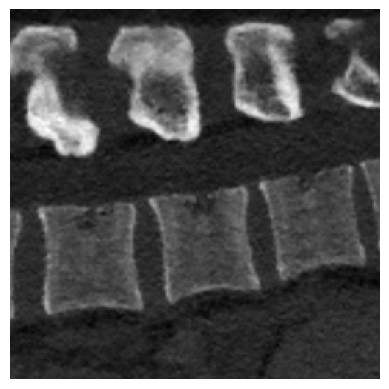

In [11]:
# load image
nii_file = nib.load(f'Data\\Output_spinetools\\crops\\sub-verse500_segment_20_crop.nii.gz')
# Get the image data
img_data = nii_file.get_fdata()

# Display the image (slice-by-slice)
num_slices = img_data.shape[-1]

# Choose a slice to display (you can change the slice index as needed)
slice_index = num_slices // 2  # Displaying the middle slice
slice_data = img_data[slice_index,...]

# Get the dimensions of the NIfTI data
dimensions = nii_file.shape
print("Dimensions (shape) of the NIfTI file:", dimensions)

# Plot the slice
plt.imshow(slice_data, cmap='gray')
plt.axis('off')
plt.show()

# Outlier

Dimensions (shape) of the NIfTI file: (241, 241, 241)


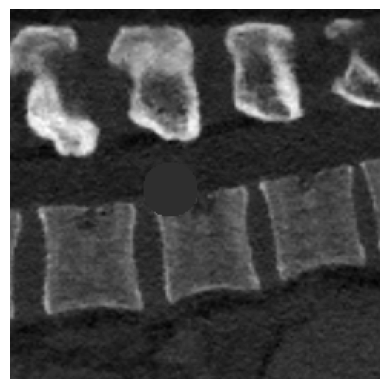

In [12]:
# load image
nii_file = nib.load(f'Data\\Output_spinetools\\crops\\sub-verse500_segment_20_crop_outlier.nii.gz')
# Get the image data
img_data = nii_file.get_fdata()

# Display the image (slice-by-slice)
num_slices = img_data.shape[-1]

# Choose a slice to display (you can change the slice index as needed)
slice_index = num_slices // 2  # Displaying the middle slice
slice_data = img_data[slice_index,...]

# Get the dimensions of the NIfTI data
dimensions = nii_file.shape
print("Dimensions (shape) of the NIfTI file:", dimensions)

# Plot the slice
plt.imshow(slice_data, cmap='gray')
plt.axis('off')
plt.show()

# Gaussian smoothing

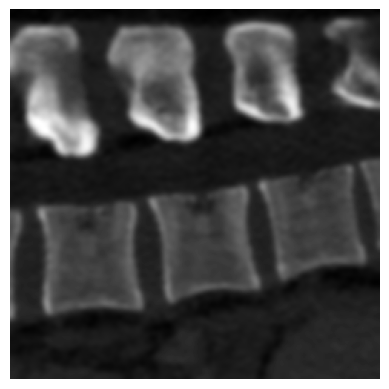

In [15]:
#Get data
nii_file = nib.load(f'Data\\Output_spinetools\\crops\\sub-verse500_segment_20_crop.nii.gz')
# Get the image data
zooms = nii_file.header.get_zooms() #Voxel sizes
img_nib = nii_file.get_fdata()


#Smooth
sigma_smooth = [0.75/zooms[0],0.75/zooms[1],0.75/zooms[2]]
data_img = gaussian_filter(img_nib, sigma=sigma_smooth)

slice_index = num_slices // 2  # Displaying the middle slice
slice_data = data_img[slice_index,...]
# Plot the slice
plt.imshow(slice_data, cmap='gray')
plt.axis('off')
plt.show()

# Hu clamping

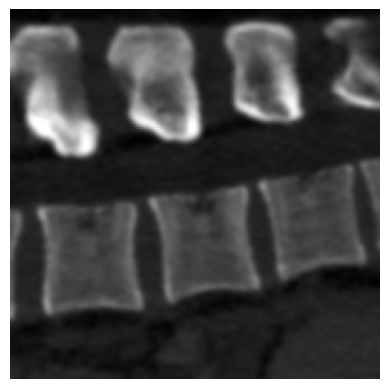

In [16]:
HU_range_cutoff = [-200, 1200]
#Change hounsfield units
data_img[data_img<HU_range_cutoff[0]] = HU_range_cutoff[0]
data_img[data_img>HU_range_cutoff[1]] = HU_range_cutoff[1]

slice_index = num_slices // 2  # Displaying the middle slice
slice_data = data_img[slice_index,...]
# Plot the slice
plt.imshow(slice_data, cmap='gray')
plt.axis('off')
plt.show()

# Hu norm

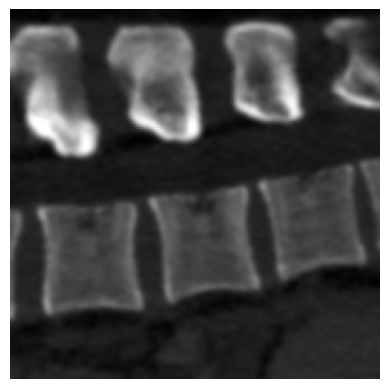

In [19]:
HU_range_normalize = [-1, 1]
data_img = (HU_range_normalize[1]-HU_range_normalize[0])*(data_img - data_img.min()) / (data_img.max() - data_img.min()) + HU_range_normalize[0]

slice_index = num_slices // 2  # Displaying the middle slice
slice_data = data_img[slice_index,...]
# Plot the slice
plt.imshow(slice_data, cmap='gray')
plt.axis('off')
plt.show()

# crop pad

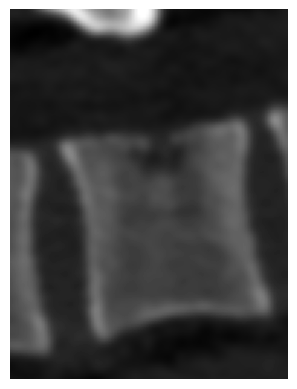

In [20]:
data = np.load(f'Data/Verse20/Outlier_detection/crops_training_prep/img/sub-verse500-20_img.npy')

slice = 64

# Plot data on the first subplot
plt.imshow(data[slice,:,:], cmap='gray')
plt.axis('off')
plt.show()